# The Carr-Madan decomposition of the payoff function

The Carr-Madan decomposition breaks any payoff into a (continuous) combination of calls and puts, plus a forward. See [here](http://www.frouah.com/finance%20notes/Payoff%20function%20decomposition.pdf) for a few derivations. For any twice differentiable function:

$$\boxed{
f(x) = f(y) + f'(y)(x-y) + \int_{-\infty}^y f''(z) (z-x)^+ dz + \int_{y}^\infty f''(z) (x-z)^+ dz
}$$

We will approximate the integrals as Riemann sums:

In [32]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [19]:
@jit(nopython=True)
def series_expansion(x, y, N=100, L=10):
    
    def f(x):
        return np.cos(x)

    def df(x):
        return -np.sin(x)

    def ddf(x):
        return - f(x)
    
    summand = f(y) + df(y)*(x-y)
    
    dz = (y+L)/N
    for i in range(1,N):
        z = -L + i*dz
        summand += ddf(z)*np.maximum(z-x, 0)*dz
        
    dz = (L-y)/N
    for i in range(1,N):
        z = y + i*dz
        summand += ddf(z)*np.maximum(x-z, 0)*dz
        
    return summand

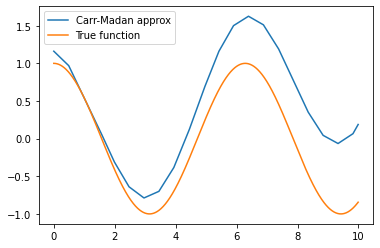

In [53]:
x_range = np.arange(0, 10, 0.01)
carr_madan = [series_expansion(x, 1, N=100, L=50) for x in x_range]

plt.plot(x_range, carr_madan, label='Carr-Madan approx')
plt.plot(x_range, f(x_range), label='True function')
plt.legend()
plt.show()

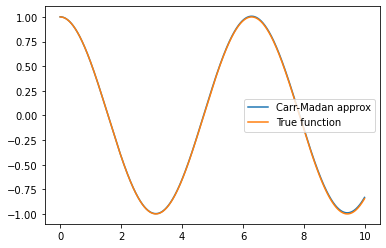

In [54]:
x_range = np.arange(0, 10, 0.01)
carr_madan = [series_expansion(x, 1, N=10000, L=50) for x in x_range]

plt.plot(x_range, carr_madan, label='Carr-Madan approx')
plt.plot(x_range, f(x_range), label='True function')
plt.legend()
plt.show()